In [1]:
import pandas as pd
from tech_core.feature_pipeline import FeaturesPipeline
from tech_core.losses import StreamingSharpeLoss
from tech_core.nn_builder import SimplePortfolioAllocator, DeepPortfolioAllocator_1
import torch
from tqdm import tqdm
# ??? Should we make different train periods for different models?

In [2]:
path_to_data = '../data/'

split_dates = [
    pd.Timestamp("2025-01-01")
]
split_names = ['train', 'test']

fee = 1.53e-4
padding = 35
batch_size_config = {
    0: 1000,
    # 40: 4000,
    # 80: 10000
}
num_epochs = 200
adam_lr = 1e-1
log_freq = 50

In [3]:
prev_models = []

batch_size = batch_size_config[0]
pipeline = FeaturesPipeline(
    path_to_data,
    padding=padding,
    batch_size=batch_size,
    split_dates=split_dates,
    split_names=split_names
)

cmf_dim = asset_dim = num_assets = None
for common_feats, asset_feats, fut_ret, _, _ in tqdm(pipeline.iterate('train'), desc="Loading features"):
    cmf_dim = common_feats.shape[1]
    asset_dim = asset_feats.shape[2]
    num_assets = asset_feats.shape[1]
    break
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Loading features: 0it [00:00, ?it/s]


  0%|          | 0/200 [00:00<?, ?it/s]

Changing batch size to 1000 at epoch 0


 24%|██▍       | 49/200 [39:38<2:02:18, 48.60s/it]

Sharpe Ratio for the epoch: 8.7255
Average Weights:



,Weight
Cash,8.490227e-01
MPWR,2.860315e-02
FICO,5.931124e-03
JPM,9.303683e-07
WFC,3.068479e-07
...,...
MO,3.153044e-10
CAG,3.091309e-10
K,3.043693e-10
BSX,2.954527e-10


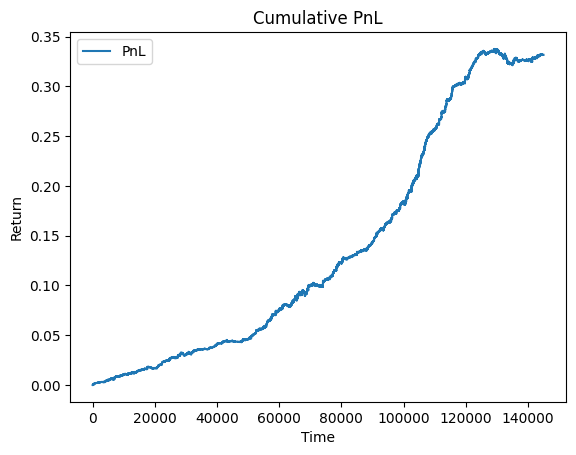

Epoch 50: Loss = 2.3737781047821045
Sharpe Ratio for the epoch: 8.0212
Average Weights:



,Weight
Cash,8.106928e-01
MPWR,1.429779e-02
FICO,2.791900e-03
JPM,4.714657e-07
WFC,1.530967e-07
...,...
FOXA,2.433179e-10
K,2.360943e-10
MO,2.350443e-10
BSX,2.329920e-10


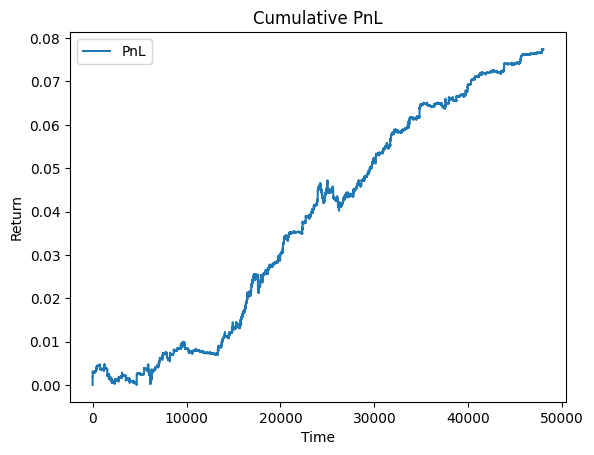

 50%|████▉     | 99/200 [1:20:09<1:22:05, 48.77s/it]

Sharpe Ratio for the epoch: 9.3690
Average Weights:



,Weight
Cash,8.545922e-01
MPWR,2.072949e-02
FICO,7.725171e-03
MTD,5.126401e-04
ZBRA,1.914217e-06
...,...
K,1.154297e-11
FOXA,1.096144e-11
MO,1.062650e-11
BSX,9.991112e-12


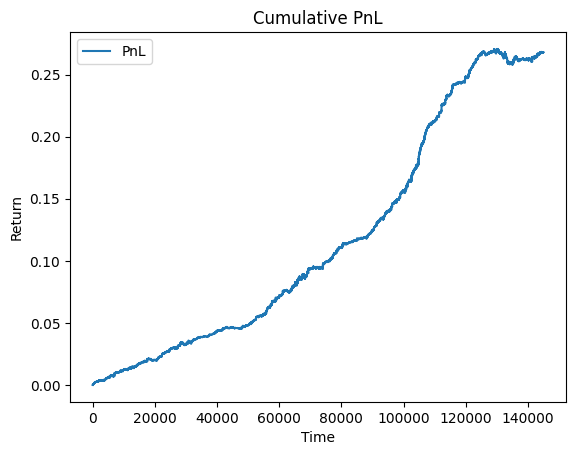

Epoch 100: Loss = -1.2181346416473389
Sharpe Ratio for the epoch: 9.0828
Average Weights:



,Weight
Cash,8.074849e-01
MPWR,1.487127e-02
FICO,4.680595e-03
MTD,7.429551e-04
ZBRA,4.969116e-06
...,...
FOXA,1.148088e-11
BSX,1.108525e-11
MO,1.104553e-11
BRK.B,1.094605e-11


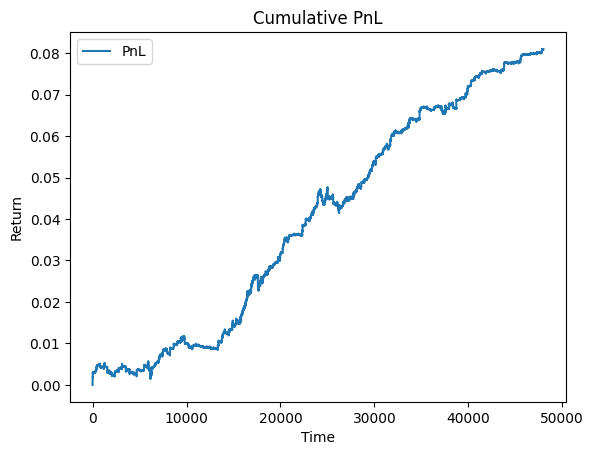

 74%|███████▍  | 149/200 [2:00:43<41:19, 48.62s/it]  

Sharpe Ratio for the epoch: 10.3249
Average Weights:



,Weight
Cash,8.649235e-01
MPWR,1.121503e-02
FICO,4.697356e-03
MTD,1.282849e-03
POOL,7.256496e-04
...,...
BRK.B,1.661190e-13
FOXA,1.623260e-13
MO,1.588481e-13
BSX,1.502496e-13


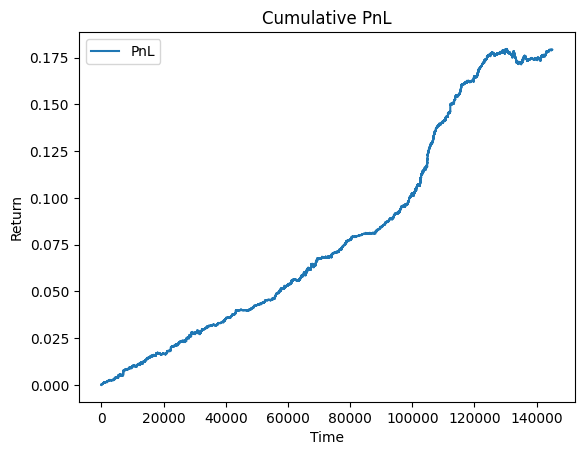

Epoch 150: Loss = -2.4367876052856445
Sharpe Ratio for the epoch: 8.8543
Average Weights:



,Weight
Cash,8.128210e-01
MPWR,8.296932e-03
FICO,3.336791e-03
MTD,1.455766e-03
ZBRA,9.745788e-04
...,...
FOXA,2.155226e-13
BSX,2.122041e-13
MO,2.095088e-13
BRK.B,2.004522e-13


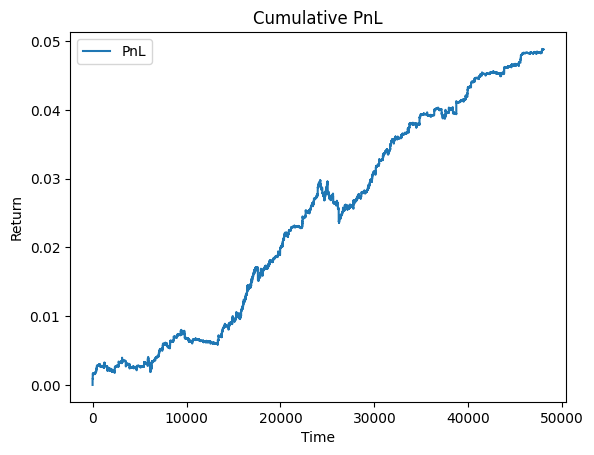

100%|█████████▉| 199/200 [2:41:20<00:48, 48.56s/it]

Sharpe Ratio for the epoch: 11.1266
Average Weights:



,Weight
Cash,8.661802e-01
MPWR,9.907245e-03
FICO,4.697358e-03
MTD,1.168981e-03
ZBRA,8.469083e-04
...,...
FOXA,1.335482e-14
LKQ,1.334656e-14
MO,1.321715e-14
BSX,1.315824e-14


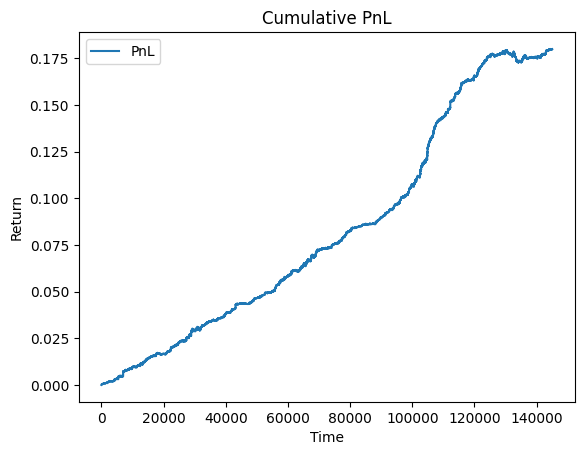

Epoch 200: Loss = -3.5911669731140137
Sharpe Ratio for the epoch: 8.5415
Average Weights:



,Weight
Cash,8.161664e-01
MPWR,5.301431e-03
FICO,2.895140e-03
MTD,1.378277e-03
ZBRA,1.081493e-03
...,...
LKQ,1.905954e-14
FOXA,1.888717e-14
MO,1.856174e-14
MCD,1.829909e-14


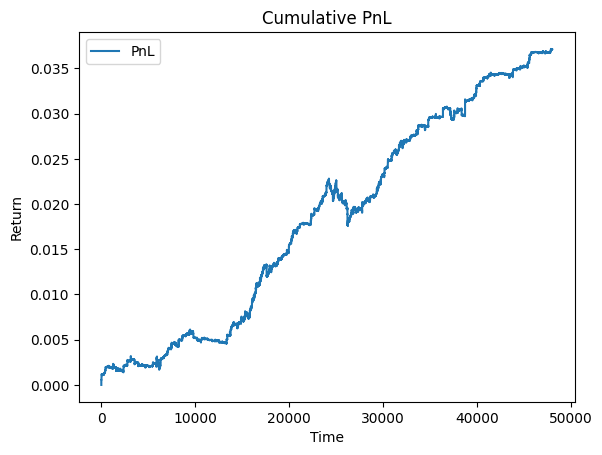

100%|██████████| 200/200 [2:42:09<00:00, 48.65s/it]

Iteration 3 completed.


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1000x126 and 127x489)

In [4]:
from copy import deepcopy

model0 = SimplePortfolioAllocator(
    cmf_dim=cmf_dim,
    num_assets=num_assets,
).to(device)
model0.load_state_dict(torch.load('model_iteration_0_epoch_200.pth'))
model0.eval()

model1 = SimplePortfolioAllocator(
    cmf_dim=cmf_dim,
    num_assets=num_assets,
).to(device)
model1.load_state_dict(torch.load('model_iteration_1_epoch_200.pth'))
model1.eval()

prev_models = [model0, model1]

for i in range(len(prev_models), 10):

    # ad-hoc so far, mb add this to pipeline
    train_cash_left = []
    for common_feats, asset_feats, fut_ret, min_prices, market_caps in pipeline.iterate('train'):

        # Перевод в тензоры
        common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)       # (T, d_common)
        asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)       # (T, n_assets, d_asset)
        fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)       # (T, n_assets)
        min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)       # (T, n_assets)
        market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)       # (T, n_assets)

        if len(common_feats) != batch_size:
            continue

        cash_left = torch.ones((common_feats.shape[0], 1), dtype=torch.float32, device=device)  # (T, 1)
        for prev_model in prev_models:
            cash_left *= prev_model(common_feats, asset_feats)[:, -1:]
        train_cash_left.append(cash_left.detach())
    
    test_cash_left = []
    for common_feats, asset_feats, fut_ret, min_prices, market_caps in pipeline.iterate('test'):
        
        common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)
        asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)
        fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)
        min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)
        market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)
        
        if len(common_feats) != batch_size:
            continue
        cash_left = torch.ones((common_feats.shape[0], 1), dtype=torch.float32, device=device)  # (T, 1)
        for prev_model in prev_models:
            cash_left *= prev_model(common_feats, asset_feats)[:, -1:]
        test_cash_left.append(cash_left.detach())

    model = SimplePortfolioAllocator(
        cmf_dim=cmf_dim + 1,
        num_assets=num_assets,
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=adam_lr)

    loss_fn = StreamingSharpeLoss(
        fee=fee,
        asset_names=pipeline.reader.asset_names + ['Cash'],  # Добавляем Cash в список активов
    )
    for epoch in tqdm(range(num_epochs)):
        if epoch in batch_size_config:
            print(f"Changing batch size to {batch_size_config[epoch]} at epoch {epoch}")
            batch_size = batch_size_config[epoch]
            pipeline = FeaturesPipeline(
                path_to_data,
                padding=padding,
                batch_size=batch_size,
                split_dates=split_dates,
                split_names=split_names
            )

        loss_fn.reset()
        pipeline.reset()
        for (common_feats, asset_feats, fut_ret, min_prices, market_caps), cash_left in zip(pipeline.iterate('train'), train_cash_left):

            common_feats['cash_left'] = cash_left.squeeze()  # Добавляем cash_left в общие признаки

            # Перевод в тензоры
            common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)       # (T, d_common)
            asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)       # (T, n_assets, d_asset)
            fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)       # (T, n_assets)
            min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)       # (T, n_assets)
            market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)       # (T, n_assets)

            if len(common_feats) != batch_size:
                continue

            optimizer.zero_grad()

            # Вычисляем веса
            weights = model(common_feats, asset_feats)

            # Обновляем метрику
            loss_value = loss_fn.forward(
                weights=weights,
                returns=fut_ret,
                prev_model_cash=cash_left,
                min_prices=min_prices,
                market_caps=market_caps
            )
            loss_value.backward()

            optimizer.step()

        if (epoch + 1) % log_freq == 0:
            _, weights_df = loss_fn.plot_whole_epoch_loss()
            weights_df.to_csv(f'weights_iteration_{i}_epoch_{epoch + 1}.csv')
            torch.save(model.state_dict(), f'model_iteration_{i}_epoch_{epoch + 1}.pth')
            print(f"Epoch {epoch + 1}: Loss = {loss_value.item()}")
        loss_fn.reset()  # Сбрасываем метрику для следующей эпохи

        for (common_feats, asset_feats, fut_ret, min_prices, market_caps), cash_left in zip(pipeline.iterate('test'), test_cash_left):

            common_feats['cash_left'] = cash_left.squeeze()  # Добавляем cash_left в общие признаки

            common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)
            asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)
            fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)
            min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)
            market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)

            if len(common_feats) !=  batch_size:
                continue

            weights = model(common_feats, asset_feats)
            loss_fn.forward(weights=weights, returns=fut_ret, prev_model_cash=cash_left, min_prices=min_prices, market_caps=market_caps)

        if (epoch + 1) % log_freq == 0:
            loss_fn.plot_whole_epoch_loss()
        loss_fn.reset()

    prev_models.append(deepcopy(model))
    print(f"Iteration {i + 1} completed.")